# **Oasis Infobyte - Data Science Internship**

# **TASK 2 - CAR PRICE PREDICTION WITH MACHINE LEARNING**

### Author : TANAY CHOUBEY
[![alt text](https://logoeps.com/wp-content/uploads/2014/02/25231-github-cat-in-a-circle-icon-vector-icon-vector-eps.png "Git Hub Link")](https://github.com/Tanay-Choubey)

#### Problem Statement: The price of a car depends on a lot of factors like the goodwill of the brand of the car, features of the car, horsepower and the mileage it gives and many more. Car price prediction is one of the major research areas in machine learning. So if you want to learn how to train a car price prediction model then this project is for you.

#### Dataset link :- https://www.kaggle.com/datasets/vijayaadithyanvg/car-price-predictionused-cars

### Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

### Loading and Understanding both dataset

In [2]:
data = pd.read_csv("car_data.csv")
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
data.shape

(301, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [6]:
data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


### Data Visualization

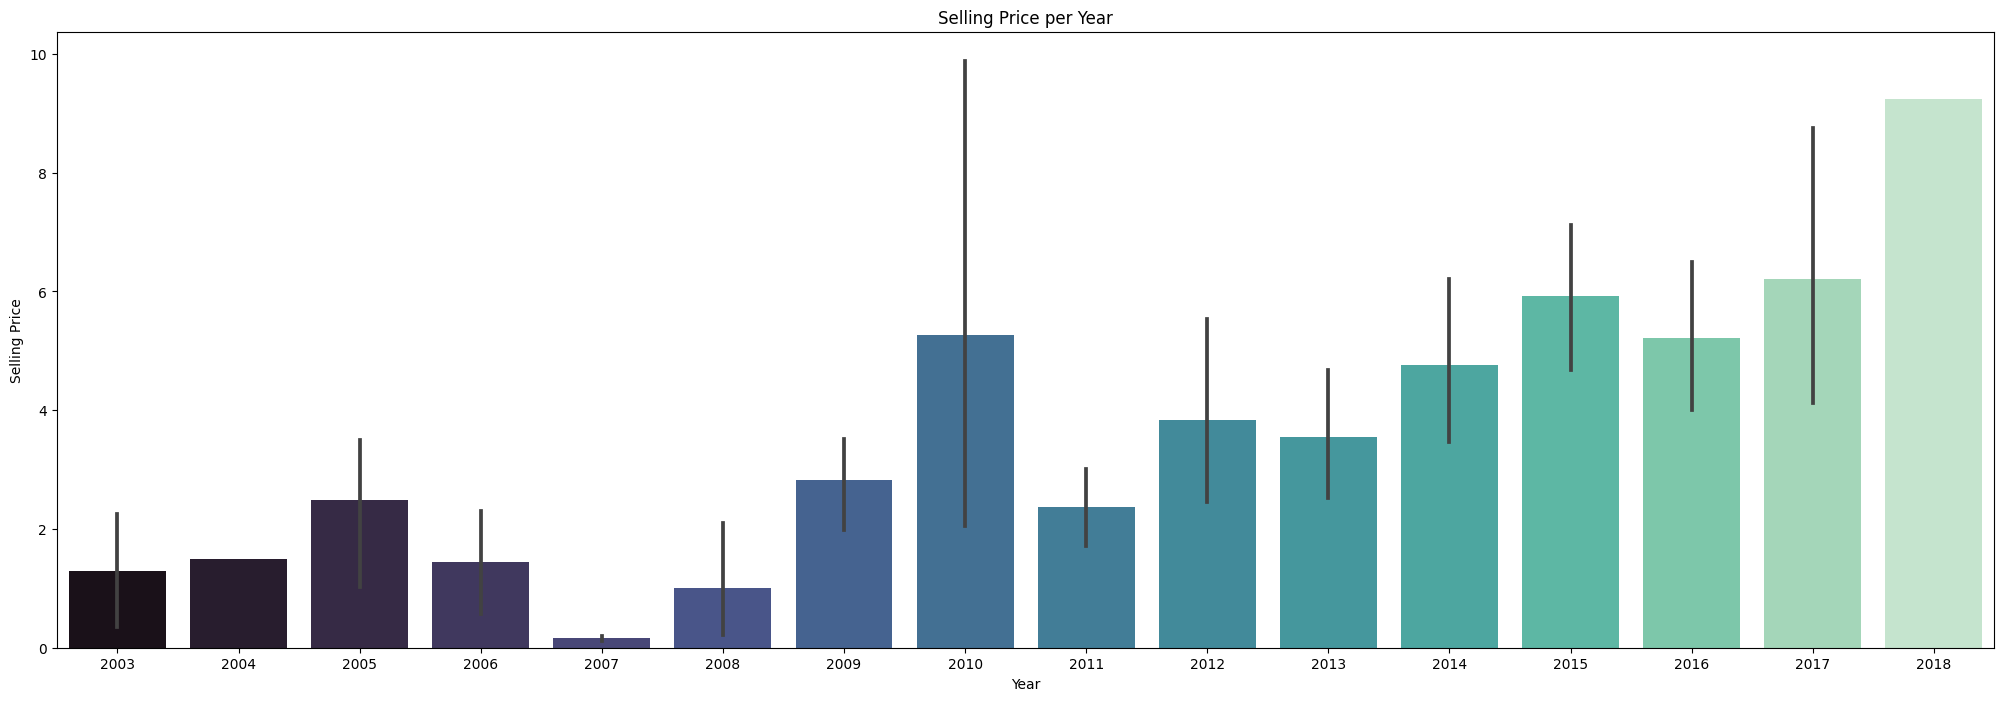

In [7]:
plt.figure(figsize=(25,8))
sns.barplot(data, x='Year', y='Selling_Price', palette='mako')
plt.ylabel("Selling Price")
plt.xlabel("Year")
plt.title("Selling Price per Year")
plt.show()

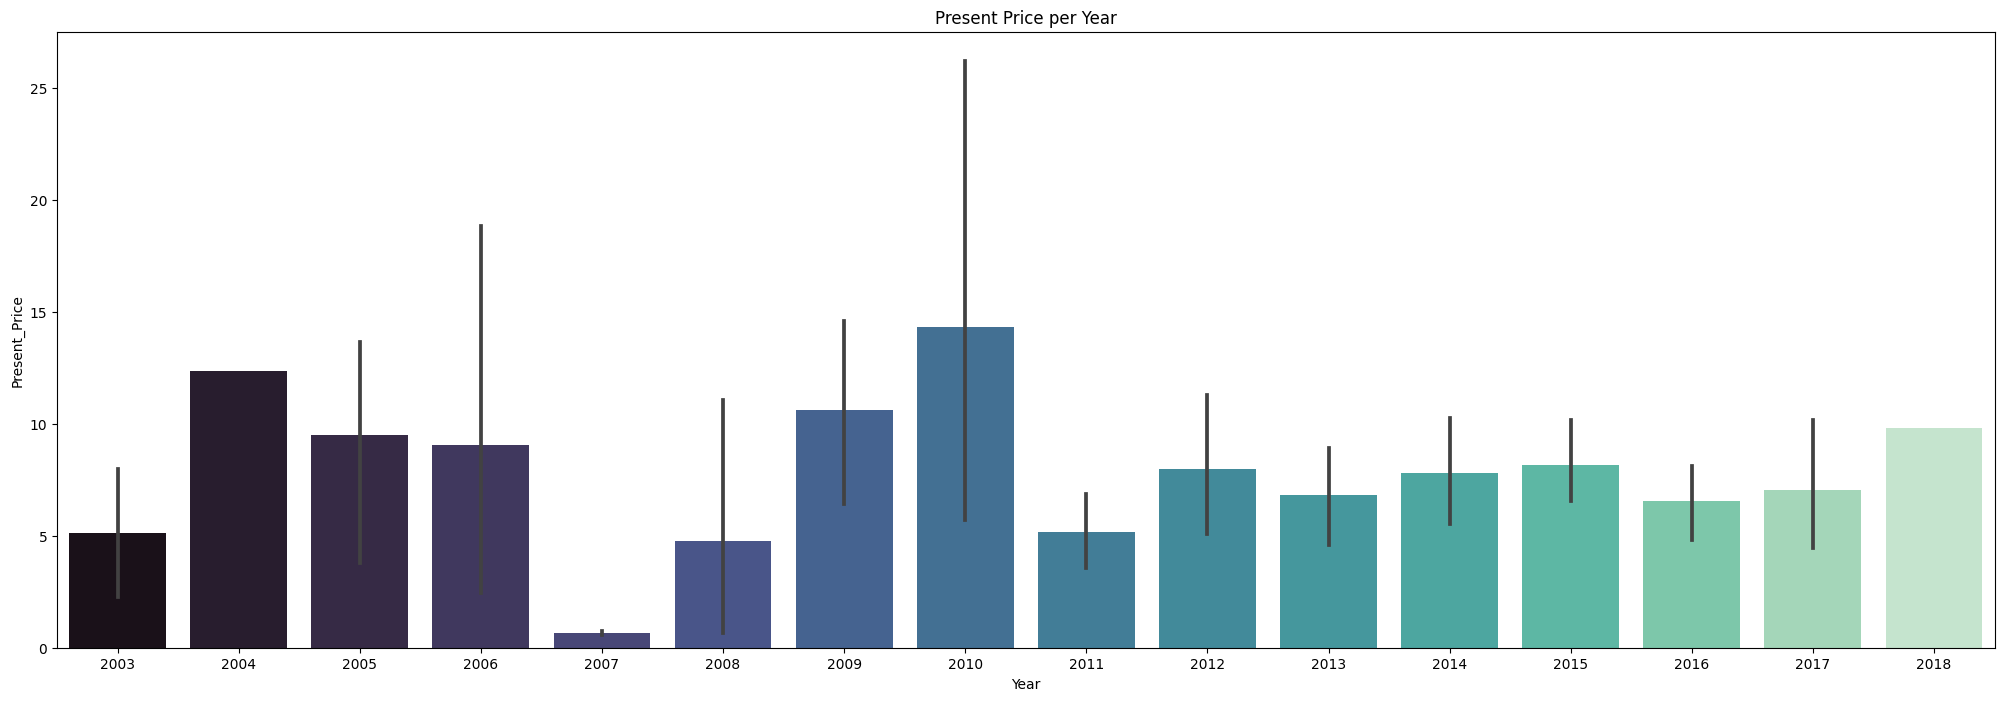

In [8]:
plt.figure(figsize=(25,8))
sns.barplot(data, x='Year', y='Present_Price', palette='mako')
plt.ylabel("Present_Price")
plt.xlabel("Year")
plt.title("Present Price per Year")
plt.show()

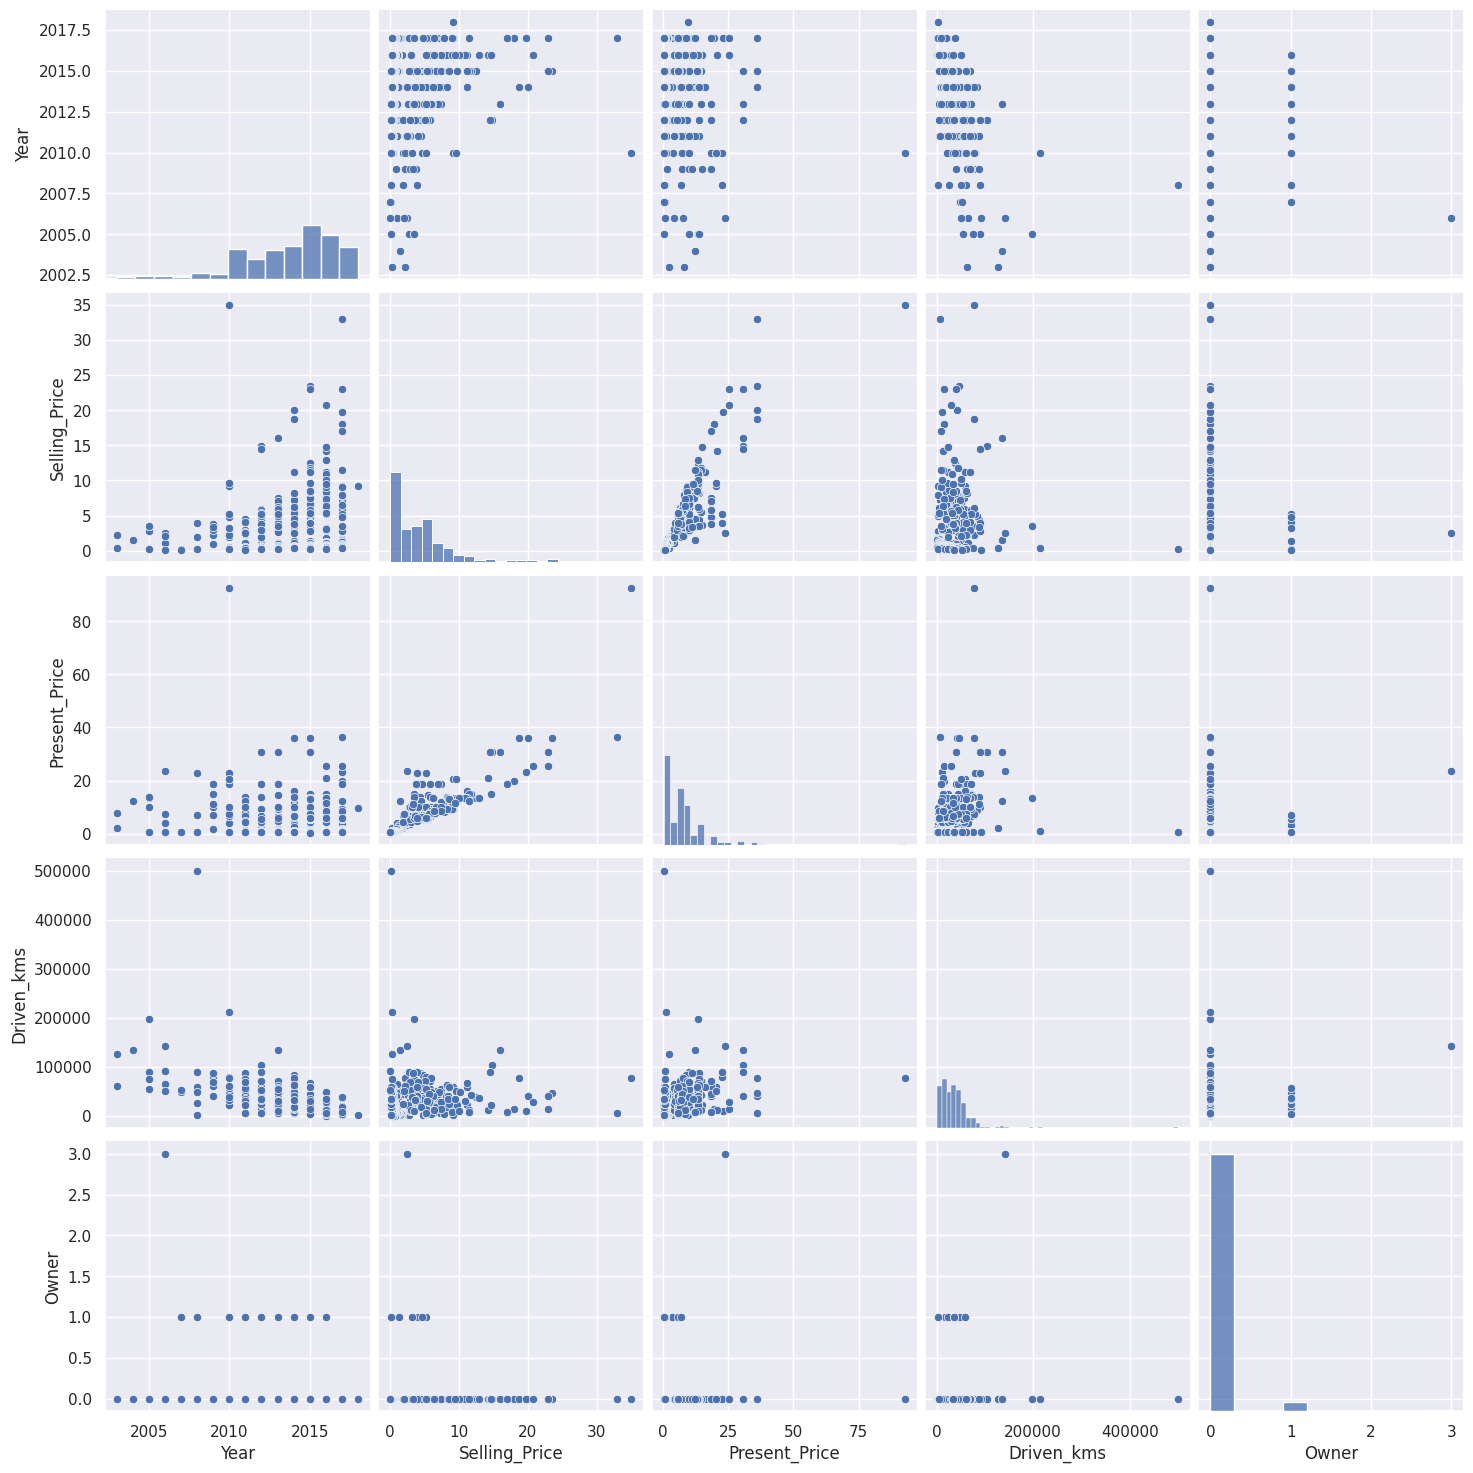

In [9]:
sns.set()
sns.pairplot(data, size = 3)
plt.show()

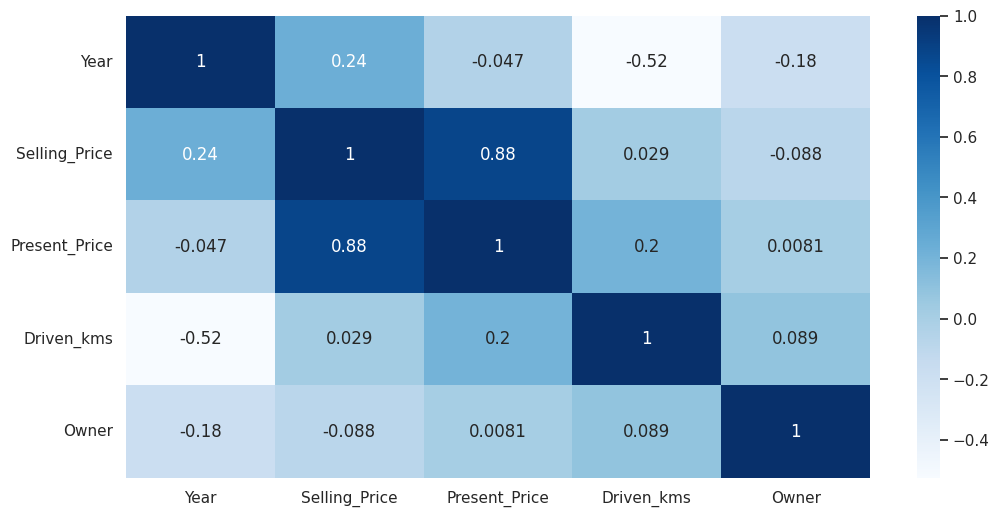

In [10]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),annot=True,cmap="Blues")
plt.show()

### Label Encoding

In [11]:
categ = data.select_dtypes(include='O')

encode = list(categ)

le = LabelEncoder()
data[encode] = data[encode].apply(lambda col: le.fit_transform(col))
data[encode]

,Car_Name,Fuel_Type,Selling_type,Transmission
0,90,2,0,1
1,93,1,0,1
2,68,2,0,1
3,96,2,0,1
4,92,1,0,1
...,...,...,...,...
296,69,1,0,1
297,66,2,0,1
298,69,2,0,1
299,69,1,0,1


### Preparing Data for Modelling

In [12]:
y = data.Owner
x = data.drop('Owner',axis=1)

In [13]:
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

### Random Forest

In [14]:
forest = RandomForestClassifier()
forest.fit(x_train,y_train)
forest.score(x_test, y_test)

0.9836065573770492

In [15]:
#Cross-validation
score = cross_val_score(forest, x_train, y_train, cv=5)
print('CROSS VAL SCORE')
print(score)
print('-'*40)
print('SCORE:',score.mean())

CROSS VAL SCORE
[0.95833333 0.95833333 0.95833333 0.95833333 0.95833333]
----------------------------------------
SCORE: 0.9583333333333334


### Gradient Boosting

In [16]:
grade = GradientBoostingClassifier()
grade.fit(x_train,y_train)
grade.score(x_test, y_test)

0.9836065573770492

In [17]:
#Cross-validation
score1 = cross_val_score(grade, x_train, y_train, cv=5)
print('CROSS VAL SCORE')
print(score)
print('-'*40)
print('SCORE:',score.mean())

CROSS VAL SCORE
[0.95833333 0.95833333 0.95833333 0.95833333 0.95833333]
----------------------------------------
SCORE: 0.9583333333333334


### Conlusion : Hence, the best model for the fitting was random forest regressor. It gave us a score of 0.958 approx on the training dataset.

# **--------------------------------------------Thank You--------------------------------------------**